In [5]:
import numpy as np, pandas as pd
import os
import ex3.sudoku_io as io
from  ex3.sudoku import Sudoku, check_sudoku,square_upperleft_cords
import simulated_annealing as sa

In [6]:
dirname = "ex3/boards"
board_filenames = map(lambda filename: dirname + "/" + filename, filter(lambda x: x != "boards", os.listdir(dirname)))


In [7]:
def blank_spaces(board):
    return np.where(board == 0)[0].size

board_fn_list = list(board_filenames)

In [8]:
from collections import Counter

blanks_to_iter = np.zeros((100, 2))
for i, fn in enumerate(board_fn_list[:100]):
    board = io.load_sudoku(fn)
    blanks = blank_spaces(board)
    problem = Sudoku(board)
    res, e_arr = sa.simulated_annealing(sa.linear_dT(0.5, x0=6e5), problem, max_i=4e5, cycles=4, acceptable_energy=2)

    # res, e_arr = sa.simulated_annealing(sa.default_dT(0.5, 0.005), problem, max_i=2e4, cycles=cycles,
    #                                     acceptable_energy=2)
    print("Working on board {}\n".format(i))
    blanks_to_iter[i] = blanks, e_arr[-1, 0]


0%

1%Working on board 0

0%

Working on board 1

0%

1%

2%

Working on board 2

0%

1%

2%

3%

Working on board 3

0%

Working on board 4

0%

Working on board 5

0%

Working on board 6

0%

1%

2%Working on board 7

0%

1%

Working on board 8

0%

1%

2%

3%

Working on board 9

0%

1%

2%

Working on board 10

0%

Working on board 11

0%

Working on board 12

0%

Working on board 13

0%

1%

Working on board 14

0%

Working on board 15

0%

Working on board 16

0%

1%Working on board 17

0%

1%

2%

3%

4%

5%

Working on board 18

0%

1%

2%

3%

4%

5%

6%

7%

8%Working on board 19

0%

Working on board 20

0%

1%

2%

Working on board 21

0%

1%

Working on board 22

0%

1%

Working on board 23

0%

1%

2%

Working on board 24

0%

1%

2%

3%

4%

5%

6%

7%

8%

9%

10%

11%

12%

13%

14%

15%

16%

17%

18%

Working on board 25

0%

Working on board 26

0%

Working on board 27

0%

Working on board 28

0%

1%

2%

3%

4%Working on board 29

0%

1%

Working on board 30

0%

1%

2%

Working on board 31

0%

1%

2%

3%

4%

5%

6%

7%

8%

9%

10%

11%

12%

13%

14%

15%

16%

Working on board 32

0%

Working on board 33

0%

1%

Working on board 34

0%

Working on board 35

0%

Working on board 36

0%

Working on board 37

0%

1%

Working on board 38

0%

Working on board 39

0%

1%

Working on board 40

0%

Working on board 41

0%

1%

Working on board 42

0%

Working on board 43

0%

1%

2%

3%

Working on board 44

0%

Working on board 45

0%

Working on board 46

0%

1%

2%

3%

4%

Working on board 47

0%

Working on board 48

0%

1%

Working on board 49

0%

1%

Working on board 50

0%

Working on board 51

0%

1%

2%

Working on board 52

0%

1%

2%

Working on board 53

0%

1%

2%

3%Working on board 54

0%

1%

2%

3%

Working on board 55

0%

1%Working on board 56

0%

Working on board 57

0%

Working on board 58

0%

Working on board 59

0%

1%

2%

Working on board 60

0%

Working on board 61

0%

1%Working on board 62

0%

1%

2%

3%Working on board 63

0%

1%

2%Working on board 64

0%

1%

2%

3%

4%

Working on board 65

0%

1%Working on board 66

0%

1%

Working on board 67

0%

Working on board 68

0%

1%Working on board 69

0%

1%

Working on board 70

0%

Working on board 71

0%

1%

2%

3%

4%

5%

6%

7%

8%

9%

10%

Working on board 72

0%

1%Working on board 73

0%

1%

2%Working on board 74

0%

Working on board 75

0%

Working on board 76

0%Working on board 77

0%

1%

2%

Working on board 78

0%

1%

Working on board 79

0%

1%

2%

3%

4%

Working on board 80

0%

Working on board 81

0%

1%

Working on board 82

0%

1%

Working on board 83

0%

Working on board 84

0%

1%

2%

Working on board 85

0%

Working on board 86

0%Working on board 87

0%

Working on board 88

0%

Working on board 89

0%

Working on board 90

0%

1%

2%

3%

4%Working on board 91

0%

Working on board 92

0%

1%

2%

3%

4%Working on board 93

0%

1%

Working on board 94

0%

1%

2%

3%

4%

5%Working on board 95

0%

Working on board 96

0%

Working on board 97

0%

Working on board 98

0%

Working on board 99



Akceptuję minimum lokalne E=2 , bo E=0 osiągam dla niewielu plansz



In [9]:
blanks =[]
means = []

for blank in np.unique(blanks_to_iter[:,0]):
    blanks.append(blank)
    means.append(np.mean(blanks_to_iter[np.where(blanks_to_iter[:,0]==blank),1]))

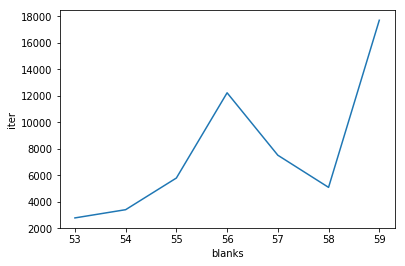

In [16]:
import  matplotlib.pyplot as plt
plt.plot(blanks,means)
plt.ylabel("iter")
plt.xlabel("blanks")
plt.show()

In [12]:
matrix={'blanks':blanks_to_iter[:,0],
        'iter': blanks_to_iter[:,1]}
blanks_pd= pd.DataFrame(matrix)

In [21]:
blanks_pd.groupby(['blanks']).size()

blanks
53.0     3
54.0     9
55.0    27
56.0    35
57.0    18
58.0     7
59.0     1
dtype: int64